<a href="https://colab.research.google.com/github/envest99/CVRP_CPLEX_ENAEF_16062019/blob/master/CVRP_CPLEX_ENAEF_28062019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np

Example of an optimal solution with IBM's CPLEX (MILP)  Solver. The Result of is the total length 85.72 (line 14/ line 13: objective accuracy 0.49%) with an elapsed time of 10minutes 30 sec.  and 103'172.19 ticks. The MILP (mixed integer linear programming) iterates by continously comparing with the relaxed (no constraints and no integers) optimal solution. If the accuracy is to big, two sub problems are created and separatly solved in order to gain time. 

In [2]:
pip install docplex

In [3]:
pip install CPLEX

In [0]:
n= 15
Q= 90
N= [i for i in range(1,n+1)]
V=[0] + N
#q={i:rnd.randint(1,10) for i in N}

In [0]:
loc_x = [8.5, 0, 5.1, 8.8, 10.6, 12, 15.7, 16.1, 12.6, 15, 10, 16, 8, 5.5, 4, 2.3]
loc_y = [6.8, 2.5, 2.75, 4.4, 0, 4, 1.4, 4.8, 7, 9.2, 10.9, 13.3, 12.8, 8.6, 13, 7.2]

In [0]:
q = {1: 23,
 2: 9,
 3: 29,
 4: 10,
 5: 21,
 6: 5,
 7: 11,
 8: 19,
 9: 30,
 10: 7,
 11: 16,
 12: 23,
 13: 15,
 14: 19,
 15: 21}

In [0]:
import matplotlib.pyplot as plt

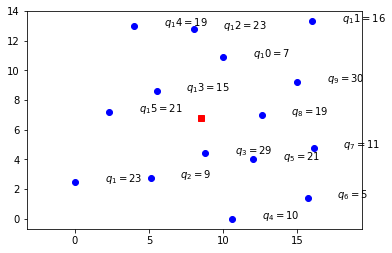

In [8]:
plt.scatter(loc_x[1:],loc_y[1:],c='b')
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2,loc_y[i]))
plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
plt.axis('equal');

In [0]:
A = [(i,j) for i in V for j in V if i!=j]
c = {(i,j):np.hypot(loc_x[i]-loc_x[j],loc_y[i]-loc_y[j]) for i,j in A}

In [0]:
from docplex.mp.model import Model

In [0]:
mdl = Model('CVRP')

In [0]:
x = mdl.binary_var_dict(A,name='x')
u = mdl.continuous_var_dict(N,ub=Q,name='u')

In [13]:
mdl.minimize(mdl.sum(c[i,j]*x[i,j] for i,j in A))
mdl.add_constraints(mdl.sum(x[i,j] for j in V if j!=i)==1 for i in N)
mdl.add_constraints(mdl.sum(x[i,j] for i in V if i!=j)==1 for j in N)
mdl.add_indicator_constraints(mdl.indicator_constraint(x[i,j],u[i]+q[j]==u[j]) for i,j in A if i!=0 and j!=0)
mdl.add_constraints(u[i]>=q[i] for i in N)
solution = mdl.solve(log_output=True)

CPXPARAM_Read_DataCheck                          1
Found incumbent of value 188.815404 after 0.00 sec. (0.03 ticks)
Tried aggregator 2 times.
MIP Presolve eliminated 15 rows and 0 columns.
MIP Presolve modified 105 coefficients.
Aggregator did 105 substitutions.
Reduced MIP has 135 rows, 360 columns, and 765 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 210 indicators.
Presolve time = 0.03 sec. (0.86 ticks)
Probing time = 0.02 sec. (1.09 ticks)
Tried aggregator 1 time.
Reduced MIP has 135 rows, 360 columns, and 765 nonzeros.
Reduced MIP has 240 binaries, 0 generals, 0 SOSs, and 210 indicators.
Presolve time = 0.01 sec. (0.53 ticks)
Probing time = 0.01 sec. (1.05 ticks)
Clique table members: 135.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 2 threads.
Root relaxation solution time = 0.00 sec. (0.29 ticks)

        Nodes                                         Cuts/
   Node  Left     Objec

In [14]:
print(solution)

solution for: CVRP
objective: 85.72
x_0_8=1
x_0_10=1
x_0_13=1
x_1_2=1
x_2_0=1
x_3_0=1
x_4_3=1
x_5_6=1
x_6_4=1
x_7_0=1
x_8_5=1
x_9_7=1
x_10_12=1
x_11_9=1
x_12_11=1
x_13_14=1
x_14_15=1
x_15_1=1
u_1=81.000
u_2=90.000
u_3=90.000
u_4=61.000
u_5=46.000
u_6=51.000
u_7=90.000
u_8=25.000
u_9=79.000
u_10=10.000
u_11=49.000
u_12=33.000
u_13=18.000
u_14=37.000
u_15=58.000



In [0]:
active_arcs = [a for a in A if x[a].solution_value>0.9]

In [16]:
solution.solve_status

<JobSolveStatus.OPTIMAL_SOLUTION: 2>

In [17]:
active_arcs

[(0, 8),
 (0, 10),
 (0, 13),
 (1, 2),
 (2, 0),
 (3, 0),
 (4, 3),
 (5, 6),
 (6, 4),
 (7, 0),
 (8, 5),
 (9, 7),
 (10, 12),
 (11, 9),
 (12, 11),
 (13, 14),
 (14, 15),
 (15, 1)]

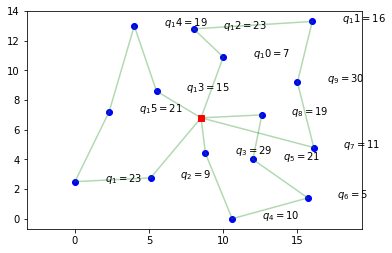

In [18]:
plt.scatter(loc_x[1:],loc_y[1:],c='b')
for i in N:
    plt.annotate('$q_%d=%d$'%(i,q[i]),(loc_x[i]+2,loc_y[i]))
for i,j in active_arcs:
    plt.plot([loc_x[i],loc_x[j]],[loc_y[i],loc_y[j]],c='g', alpha=0.3)
plt.plot(loc_x[0],loc_y[0],c='r',marker='s')
plt.axis('equal');